In [1]:

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from nltk.translate.bleu_score import sentence_bleu
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, classification_report

import numpy as np
import unicodedata
import re
import pandas as pd
import tensorflow.keras
from nltk.translate.bleu_score import corpus_bleu
from keras.utils.vis_utils import model_to_dot, plot_model
from IPython.display import SVG


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Lambda, Dot, Activation, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

from myutils import eda_MAX_NB_WORDS, eda_MAX_DOC_LEN, text_preprocessor, history_plot
from nltk.translate import bleu

import numpy as np
import seaborn as sns

from myutils import eda_MAX_NB_WORDS,eda_MAX_DOC_LEN, text_preprocessor, cnn_model
import nltk, re, string
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
import numpy as np  
import pandas as pd

import time
import string
import seaborn as sns
import pandas as pd
import os
import numpy as np
import nltk, re, string
import nltk
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from PIL import Image
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer,cosine_distance
from math import log
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
import statsmodels.api as sm  
import statsmodels.formula.api as smf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
# 需要有文本数据 + 背景图片
# from google.colab import drive
# drive.mount('/content/drive')
tqdm.pandas(desc='pandas bar')
stop_words = stopwords.words('english')

Using TensorFlow backend.


In [2]:
%%time
d1 = pd.read_csv("E:/658_final_proj/dataset/tweets_full.csv",sep=';', header=0, error_bad_lines=False)
d2 = d1.dropna(subset=['timestamp'], how='any')
d2.index = pd.to_datetime(d2['timestamp'], format='%Y-%m-%d %H:%M:%S')
d3 = d2[(d2.timestamp>'2016-01-01') & (d2.timestamp< '2018-01-01') ]
d3['text'] = d3[['text']].astype(str)
sample_size = 100000000

Wall time: 1min 26s


In [3]:
d3.shape

(1300647, 9)

In [4]:
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) 
        if unicodedata.category(c) != 'Mn') 


def normalize_string(s):
    s = unicode_to_ascii(s)
    s = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', s, flags=re.MULTILINE)  
    s = re.sub(r'([!.?])', r' \1', s) 
    s = re.sub(r'[^a-zA-Z!?]+', r' ', s) 
    s = re.sub(r'\s+', r' ', s) 
    return s.lower()

In [5]:
dt=d3[1:sample_size]
dt['normalized_en'] = dt["text"].progress_apply(normalize_string)
dt['text_len'] = dt.text.map(lambda x: len(str(x)))
dt = dt.reset_index(drop=True)
dt.head()

pandas bar: 100%|█████████████████████████████████████████████████████████| 1300646/1300646 [00:58<00:00, 22181.20it/s]


,id,user,fullname,url,timestamp,replies,likes,retweets,text,normalized_en,text_len
0,935411301056069633,real_vijay,Vijay Boyapati,NaN,2017-11-28 07:33:27+00,12.0,509.0,238.0,"1/ While there are no a priori rules about the path a monetary good will take as it is monetized, a curious pattern has emerged during the relatively brief history of Bitcoin’s monetization.",while there are no a priori rules about the path a monetary good will take as it is monetized a curious pattern has emerged during the relatively brief history of bitcoin s monetization,190
1,825070546018828289,Annrhefn,Annrhefn,NaN,2017-01-27 19:58:41+00,19.0,267.0,155.0,Central Banking created Debt Serfdom. This is as simple as it gets. Changing the money is changing the world. And now we have Bitcoin. https://t.co/sSxhl8nURS,central banking created debt serfdom this is as simple as it gets changing the money is changing the world and now we have bitcoin,158
2,908321948366786560,pierre_rochard,Pierre Rochard [🌮⚡️🔑],NaN,2017-09-14 11:30:02+00,19.0,1248.0,434.0,I would not be interested in Bitcoin if governments didn't want to ban it.,i would not be interested in bitcoin if governments didn t want to ban it,74
3,935888810541494277,hkanji,hussein kanji,NaN,2017-11-29 14:10:55+00,5.0,135.0,110.0,How many days it took Bitcoin to get from:\n\n$0 - $1000: 1789 days\n$1000 - $2000: 1271 days\n$2000 - $3000: 23 days\n$3000 - $4000: 62 days\n$4000 - $5000: 61 days\n$5000 - $6000: 8 days\n$6000 ...,how many days it took bitcoin to get from days days days days days days days days days days,273
4,938803472748728320,zerohedge,zerohedge,NaN,2017-12-07 15:12:44+00,100.0,1434.0,1015.0,"Bitcoin \n\n$11,000-$12,000: 6 days\n$12,000-$13,000: 17 hours\n$13,000-$14,000: 4 hours\n$14,000-$15,000: 10 hours\n$15,000-$16,000: 5 hours\n$16,000-$17,000: 2 hours",bitcoin days hours hours hours hours hours,160


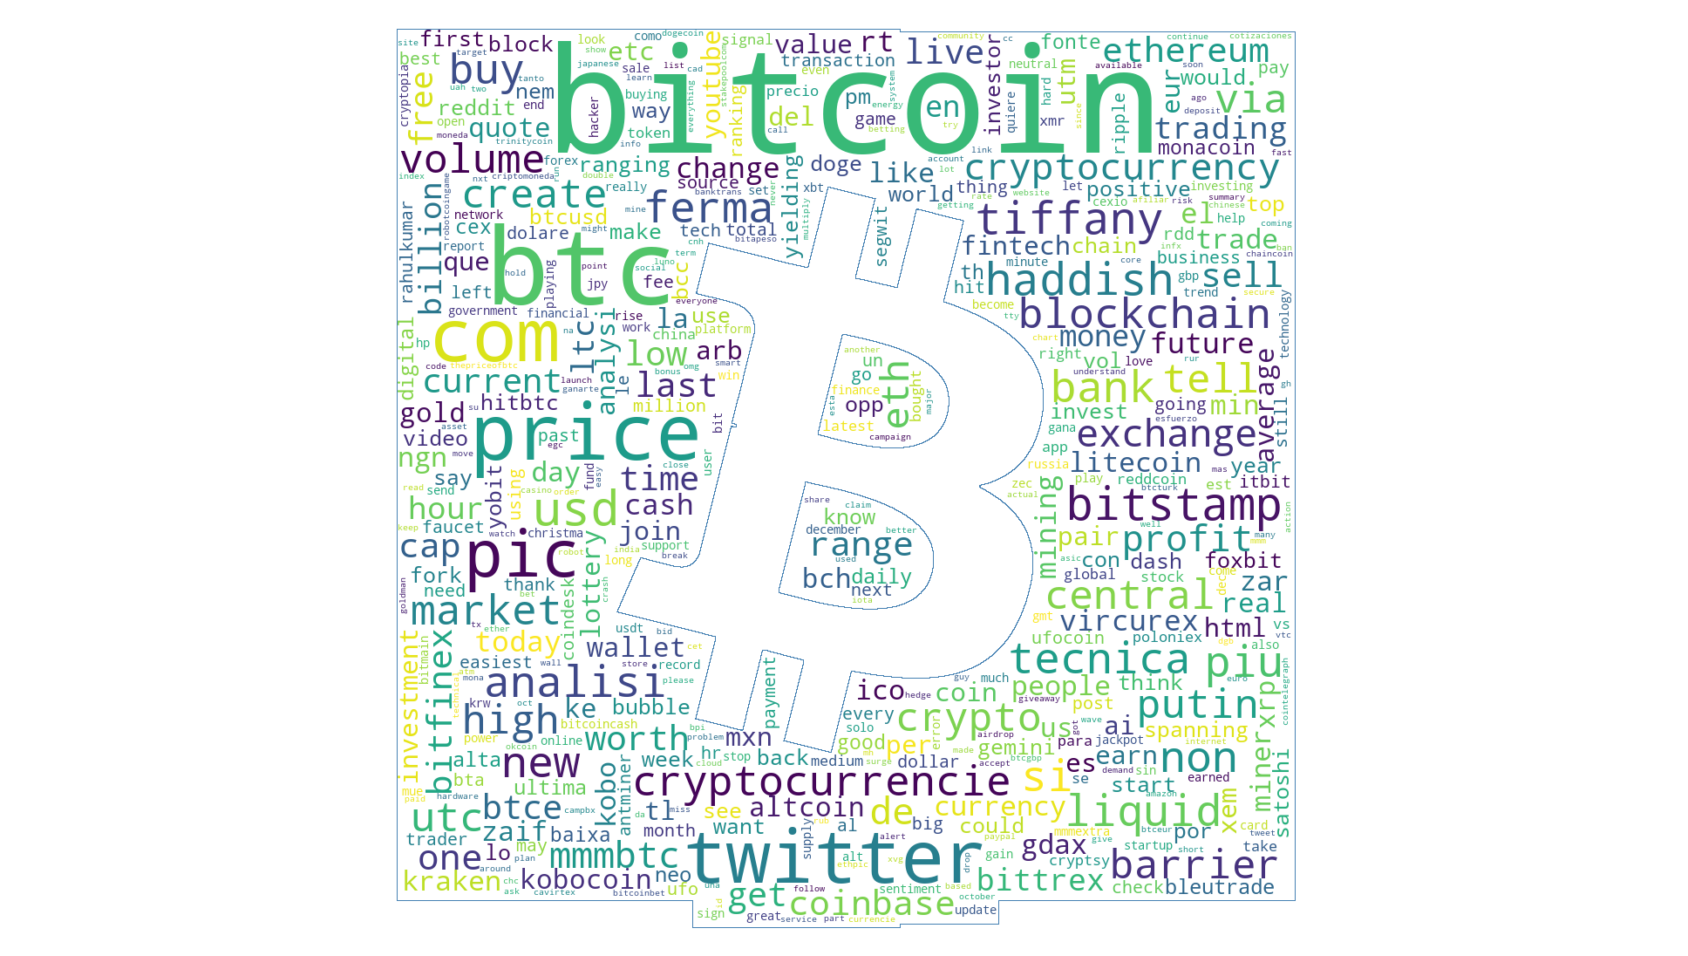

In [6]:
ssss = " ".join(dt.normalized_en.values)
alice_mask = np.array(Image.open("E:/bitcoin-3.png"))

wordcloud = WordCloud(mask = alice_mask,background_color='white', max_words=500
                      , contour_width=1, contour_color='steelblue', stopwords=stop_words,
                      collocations = False).generate(ssss);

plt.figure(figsize=(30,30));
plt.imshow(wordcloud, interpolation="bilinear");
plt.axis("off");
plt.show();

# Sentiment

## Sentiment - Naive

In [7]:
with open("E:/OneDrive - stevens.edu/Stevens BIA/656_B/656-Proj/positive-words.txt",'r') as f:
    positive_list=[line.strip() for line in f]
with open("E:/OneDrive - stevens.edu/Stevens BIA/656_B/656-Proj/negative-words.txt",'r') as f:
    negative_list=[line.strip() for line in f]
negations=["not", "no", "isn", "wasn", "aren","weren", "don", "didn", "cannot", "couldn", "neither", "nor"]    
print("Postive Vocab size: ",len(positive_list), "\nNegative Vocab size: ", len(negative_list))

Postive Vocab size:  2006 
Negative Vocab size:  4783


In [8]:
def tokenize(text):
    return [i for i in text.split() if len(i)>2]

def sentiment_analysis(text):
    tokens = tokenize(text)
    p = 0
    n = 0
    ## Specify the rule of definition
    for idx, token in enumerate(tokens):
        if token in positive_list:
            if idx>0: 
                if tokens[idx-1] not in negations: # if a positive word not preceded by a negation word
                    p+=1
                elif (tokens[idx-1] in negations) & (token in negative_list): # a negative word preceded by a negation word
                    p+=1
            else:
                p+=1
    
    for idx, token in enumerate(tokens):
        if token in negative_list:
            if idx>0: 
                if tokens[idx-1] not in negations: # if a negative word not preceded by a negation word
                    n+=1
                elif (tokens[idx-1] in negations) & (token in positive_list): # a positive word preceded by a negation word
                    n+=1
            else:
                n+=1 # The first one is negative
    return np.array([p, n])



In [9]:
%%time


def naive_lec(a):
    senti = a.progress_apply(sentiment_analysis) 

    p = [i[0] for i in senti]
    pos = pd.DataFrame(p,columns=['pos'])

    n = [i[1] for i in senti]
    neg = pd.DataFrame(n,columns=['neg'])

    p_n = [i[0] - i[1] for i in senti]
    pos_neg = pd.DataFrame(p_n,columns=['pos_neg'])
    
    sss = pd.concat([pos, neg, pos_neg],axis=1)
    lec_senti = sss.add_prefix('lec_')
    return lec_senti



Wall time: 0 ns


## Sentiment - Vader
- use Vader package

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def vader_lec(a):
    sss = []
    for sentence in tqdm(a):
        ss = sid.polarity_scores(sentence)
        sss.append([ss['neg'],ss['neu'],ss['pos'],ss['compound']])

    r = pd.DataFrame(sss, columns=['neg', 'neu', 'pos', 'compound'])
    vader_senti = r.add_prefix('vadar_')
    return vader_senti


lec_senti = naive_lec(dt['normalized_en'])
vader_senti = vader_lec(dt['normalized_en'])


100%|██████████████████████████████████████████████████████████████████████| 1300646/1300646 [02:25<00:00, 8932.14it/s]


## CNN sentiment

### Trained with labeled dataset

In [11]:
train = pd.read_csv("E:/OneDrive - stevens.edu/Stevens BIA/656_B/656-Proj/data/train.csv").astype(str)
test = pd.read_csv("E:/OneDrive - stevens.edu/Stevens BIA/656_B/656-Proj/data/test.csv").astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27486 entries, 0 to 27485
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27486 non-null  object
 1   text           27486 non-null  object
 2   selected_text  27486 non-null  object
 3   sentiment      27486 non-null  object
dtypes: object(4)
memory usage: 859.1+ KB


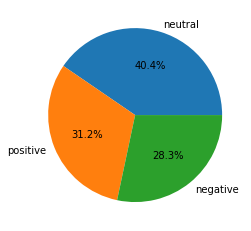

In [12]:
# Show the precentage = Balance dataset
import matplotlib.pyplot as plt
nums = train['sentiment'].value_counts().values
labels = train['sentiment'].value_counts().keys()
plt.pie(x = nums, labels=labels,autopct='%1.1f%%')
plt.show()

In [13]:
replace_map = {'sentiment': {'neutral': 0, 'positive': 1, 'negative':-1}}
train.replace(replace_map, inplace=True)
test.replace(replace_map, inplace=True)

### EDA

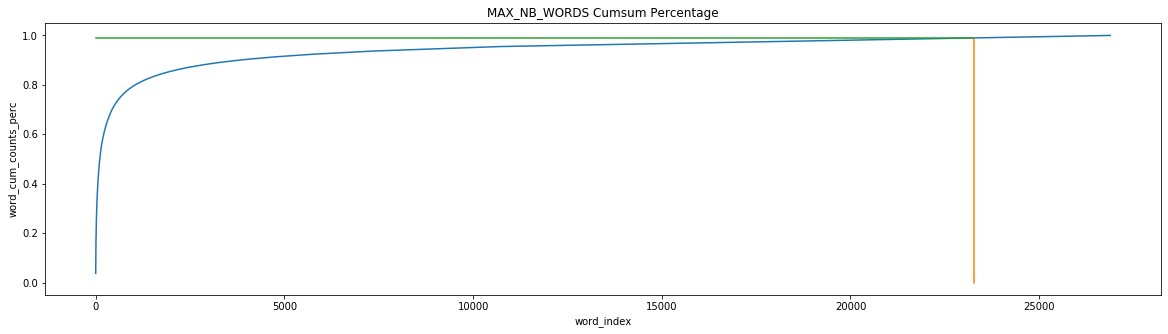

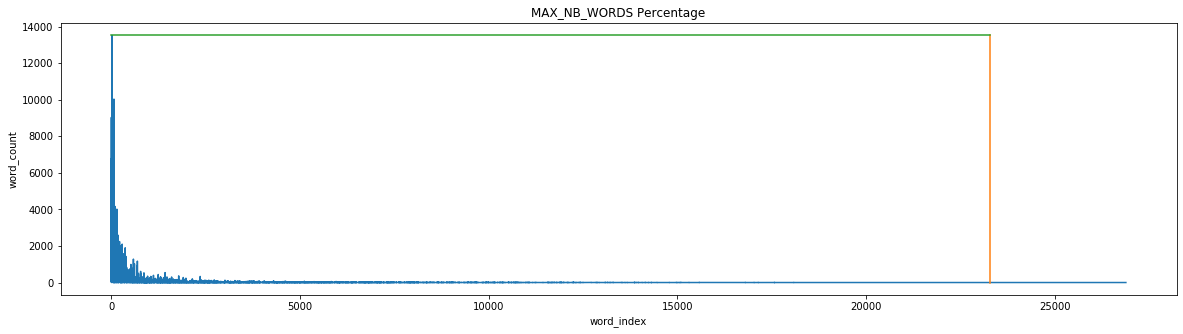

Cut index with 99.0 % of corpus:  23281 

    index  word  count
0      19     i  13517
1      69    to  10035
2       1   the   9037
3       5     a   6801
4      10    my   5548
5       9   and   5166
6      45   you   4866
7      96    it   4163
8     147    is   4013
9       4    in   3819
10     23   for   3657
11     17    of   3159
12     29    on   2870
13    135    me   2870
14     75    so   2629
15    119  have   2601
16    176  that   2592
17    130   but   2408
18     94  just   2278
19    217   i'm   2242


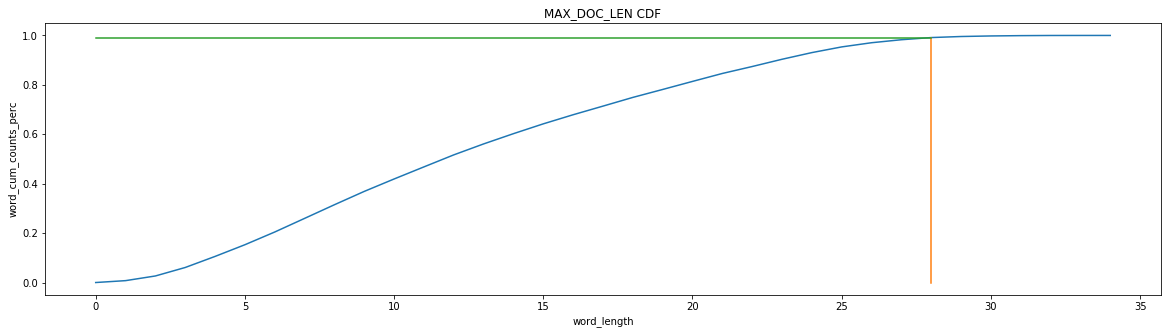

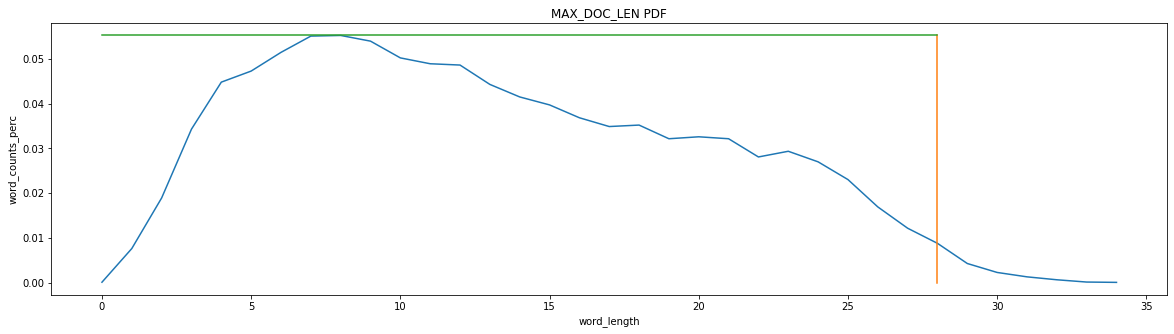

Cut index with 99.0 % of corpus:  28
Wall time: 2.7 s


In [14]:
%%time
char_level_switch = False
corpus = train['text'].astype(str).values
MAX_NB_WORDS = eda_MAX_NB_WORDS(corpus, ratio = 0.99, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' ,char_level = char_level_switch)
MAX_DOC_LEN = eda_MAX_DOC_LEN(corpus, ratio = 0.99, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' ,char_level = char_level_switch)

# initialize
processor_x = text_preprocessor(MAX_DOC_LEN, MAX_NB_WORDS, corpus,  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' ,char_level = char_level_switch) 


### Load CNN from Class & Define classification taks 

In [15]:
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [16]:
def history_plot(training, extra_metric=None):

    ################## plot training history
#     dic = ['val_loss', 'loss', 'val_acc', 'acc', "val_auroc"] # print(training.history)
#     loss: 0.8109 - acc: 0.6362 - auroc: 0.7960 - val_loss: 0.6793 - val_acc: 0.7144 - val_auroc: 0.8684
    dic = list(training.history.keys())

    if extra_metric is not None:
        idx = [[0,3],[1,4],[2,5]]
    else:
        idx = [[0,2],[1,3]]

    for i,j in idx:
        print("========================================================================")
        print(dic[i],dic[j])
        xx = list(range(1,len(training.history[dic[i]])+1))
        plt.plot(xx,training.history[dic[i]], color = 'navy', lw = 2, label = 'Model_'+str(dic[i]))
        plt.plot(xx,training.history[dic[j]], color = 'darkorange', lw = 2, label = 'Model_'+str(dic[j]))
        plt.title(str(dic[i]) + "v.s. training_" + str(dic[j]))
        plt.xlabel('Epochs')
        plt.ylabel(str(dic[i]))
        plt.legend()
        plt.show();
    return None

In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, BATCH_SIZE, NUM_EPOCHES, BestModel_Name="best_model" ):
    

    #### Best model selection 
    patience=10
    BEST_MODEL_FILEPATH = BestModel_Name
    earlyStopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, mode='min') # patience: number of epochs with no improvement on monitor : val_loss
    # 这里可以monitor auc 
    checkpoint = ModelCheckpoint(BEST_MODEL_FILEPATH, monitor='val_loss', verbose=0, save_best_only=True, mode='min')

    history = model.fit(x_train, y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=NUM_EPOCHES, callbacks=[earlyStopping, checkpoint], verbose=2)
    model.load_weights(BestModel_Name)



    #### Result
    history_plot(history)
    y_pred = model.predict(x_test)
#     print(classification_report(y_test, y_pred>0.5))

    
    scores = model.evaluate(x_test, y_test, verbose=2)
    print("%s: %.2f%" % (model.metrics_names[1], scores[1]*100))
    print( "\n\n\n")
    
    return y_pred, model # 也许能出 tpr 和 fpr图

In [ ]:
# the validation set can be split in fitting function: validation_split=0.2  

# generate padding dataset
x_train = processor_x.generate_seq(train['text'])
# le = preprocessing.LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_train = to_categorical(train['sentiment'])
y_train = train['sentiment'].astype(float)
x_test = processor_x.generate_seq(test['text'])
# y_test = to_categorical(test['sentiment'])
y_test = test['sentiment'].astype(float)

print('Shape of x_tr: ' + str(x_train.shape))
print('Shape of y_tr: ' + str(y_train.shape))
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_test: ' + str(y_test.shape))

In [ ]:
# define Model for classification

def model_Create(FS, NF, MDL, MNW, EMB, PWV = None):
    # PRETRAINED_WORD_VECTOR = embedding_matrix
    cnn_box = cnn_model(FILTER_SIZES=FS, MAX_NB_WORDS=MNW, MAX_DOC_LEN=MDL, EMBEDDING_DIM=EMB, NUM_FILTERS=NF, PRETRAINED_WORD_VECTOR=PWV)
    
#     plot_model(cnn_box,show_shapes=False,to_file='cnn_base-1.png')
    
    q1_input = Input(shape=(MDL,), dtype='int32', name='q1_input') # Hyperparameters: MAX_DOC_LEN
    encode_input1 = cnn_box(q1_input)
    half_features = int(len(FS)*NF/2)
    dense1 = Dense(half_features,activation='relu', name='half_features')(encode_input1)
    drop_1 = Dropout(rate=0.4, name='dropout')(dense1)
    pred = Dense(1,activation='tanh', name='Prediction')(drop_1)
    
    
    model = Model(inputs=q1_input, outputs=pred)    
    
    
    return model


## Best CNN

In [ ]:
############# Set hyper parameters
BATCH_SIZE=256
NUM_EPOCHES=100 # patience=20
NUM_FILTERS=32
FILTER_SIZES=[1,2,3,4]
EMBEDDING_DIM = 300
CBOW_W2V = processor_x.w2v_pretrain(EMBEDDING_DIM) 
# Glove_W2V = processor.load_glove_w2v(EMBEDDING_DIM) 

model = model_Create(FS=FILTER_SIZES, NF=NUM_FILTERS, MDL=MAX_DOC_LEN,MNW=MAX_NB_WORDS, EMB=EMBEDDING_DIM, PWV = CBOW_W2V)

################## compile and fit model
print("@"*10," "*5, model.get_config()['name']," Processing"," "*5,"@"*10)
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# adam = optimizers.adam(lr=1e-3)
rmsprop = optimizers.RMSprop(lr=1e-3)
# model.compile(loss='mse', optimizer= adam, metrics=['mse'])
model.compile(loss='mse', optimizer= rmsprop, metrics=['mse'])

# plot_model(model,show_shapes=False,to_file='model_q2.png')
y_pred, model = train_model(model, x_train, y_train, x_test, y_test, BATCH_SIZE, NUM_EPOCHES, BestModel_Name='model-cnnn')

In [ ]:
x_twt = processor_x.generate_seq(dt['text'])
twt_senti_CNN = model.predict(x_twt)
twt_senti_CNN = pd.DataFrame(twt_senti_CNN, columns=['cnn_neg','cnn_neu', 'cnn_pos'])

In [ ]:
dt1 = pd.concat([dt, lec_senti, vader_senti, twt_senti_CNN],axis=1)
dt1.columns

## Sentiment features extended

In [ ]:
dt1['pos_likes'] = dt1['likes']*dt1['lec_pos']
dt1['pos_retweets'] = dt1['retweets']*dt1['lec_pos']
dt1['neg_retweets'] = dt1['retweets']*dt1['lec_neg']
dt1['vadar_pos_likes'] = dt1['likes']*dt1['vadar_pos']
dt1['vadar_compound_retweets'] = dt1['retweets']*dt1['vadar_compound']
dt1['vadar_neg_retweets'] = dt1['retweets']*dt1['vadar_pos']
dt1['cnn_neg_pos_likes'] = dt1['likes']*dt1['cnn_pos']
dt1['cnn_neg_compound_retweets'] = dt1['retweets']*dt1['cnn_neu']
dt1['cnn_neg_neg_retweets'] = dt1['retweets']*dt1['cnn_pos']

dt1.head()

In [ ]:
dt2 = dt1.copy()
dt2.index = pd.to_datetime(dt1.timestamp)
dt3 = dt2.iloc[:,11::]
dt3.shape

In [ ]:
dt3.columns

In [ ]:
dt3.head()

In [ ]:
dt4 = dt3.resample('120min').sum()

In [ ]:
dt4.head()

In [ ]:
# dt4 = dt3.resample('60min').agg({'lec_pos': ['sum', 'mean','count'], 
#                                           'lec_neg': ['sum', 'mean'],
#                                           'lec_pos_neg': 'sum', 
#                                           'pos_retweets':'sum' , 
#                                           'neg_retweets':'sum', 
# #                                           'likes':'sum', 
# #                                           'replies':'sum', 
#                                           'pos_likes':'sum',
# #                                           'retweets':'sum',
#                                           "vadar_neg":'sum',
#                                           "vadar_pos":'sum',
#                                           "vadar_compound":'sum',
#                                           'vadar_pos_likes':'sum',
#                                           'vadar_compound_retweets':'sum',
#                                           'vadar_neg_retweets':'sum'                     
#                                          })

# dt4.columns = ['pos_sum', 'pos_mean','count',
#                      'neg_sum', 'neg_mean', 
#                      'pos_neg_sum',
#                      'pos_ret_sum',
#                      'neg_ret_sum',
# #                      'likes_sum', 
# #                      'replies_sum', 
#                      'pos_likes_sum',
# #                      'retweets_sum',
#                      'vadar_neg_sum',
#                      'vadar_pos_sum',
#                      'vadar_compound_sum',
#                      'vadar_pos_likes_sum',
#                      'vadar_compound_retweets_sum',
#                      'vadar_neg_retweets_sum'                   
#                     ]
# dt4.describe()

## Sentiment Save